# I Solving the Sum of Two Digits Programming Challenge

## C++

In [ ]:
%%writefile APlusB.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing APlusB.cpp


In [ ]:
!g++ APlusB.cpp -o APlusB
!./APlusB

4 11
15

### Test input output files

In [ ]:
%%writefile input1.txt
4 8

Writing input1.txt


In [ ]:
%%writefile output1.txt
12

Writing output1.txt


In [ ]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [ ]:
%%writefile output2.txt
4

Writing output2.txt


In [ ]:
!./APlusB < input1.txt

12

In [ ]:
!./APlusB < input2.txt

4

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [ ]:
!grep -xvFf output1.txt output1.txt 

In [ ]:
!grep -xvFf output1.txt output2.txt 

4


In [ ]:
!grep -xvFf output2.txt output1.txt 

12


In [ ]:
!./APlusB < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [ ]:
!./APlusB < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

## Python

In [ ]:
%%writefile sum.py
# python3

def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [ ]:
!python sum.py

30 90
120


In [ ]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

In [ ]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [ ]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [ ]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

6
23 1 89 56 34 5
4984


### Test 1: Small numbers

In [ ]:
%%writefile input1.txt
10
1 2 3 4 5 6 7 8 9 10

Overwriting input1.txt


In [ ]:
!./max_pairwise_product < input1.txt

90


### Test 2: largest input numbers 200000 200000 in the input

In [ ]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [ ]:
!./max_pairwise_product < input2.txt

1345294336


Changing the variables to long long

In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_long.cpp


In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!./max_pairwise_product_long < input1.txt
!./max_pairwise_product_long < input2.txt

90
40000000000


### Test 3  stress tests 20  times  random n in [2, 20] 

In [9]:
%%writefile stress_test.cpp
#include <bits/stdc++.h>
#include <cstdlib>

using namespace std;

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }
    return max_product;
}

long long MaxPairwiseProductLL(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

void test(int t) {
    for (int i = 0; i < t; i++) {
        int n = rand() % 19 + 2;
        vector<int> numbers(n);
        cout << "Test ";
        cout << "n = " << n << '\n';
        for (int i = 0; i < n; i++) {
            int number = rand() % 200000 + 1;
            numbers[i] = number;
        }
        long long sol1 = MaxPairwiseProductLL(numbers);
        long long sol2 = MaxPairwiseProduct(numbers);
        if (sol1 != sol2) {
            cout << "Wrong solution\n";
            cout << "Expected solution: " << sol1 << '\n';
            cout << "Found solution: " << sol2 << "\n\n";
        } else {
            cout << "Right solution\n\n";
        }
        
    }
}

int main() {
    test(20);
    return 0;
}

Overwriting stress_test.cpp


In [10]:
!g++ stress_test.cpp -o stress_test
!./stress_test

Test n = 4
Wrong solution
Expected solution: 19344313278
Found solution: 1160996008

Test n = 10
Wrong solution
Expected solution: 27073724663
Found solution: 2088920396

Test n = 9
Wrong solution
Expected solution: 35835949563
Found solution: 1919983863

Test n = 8
Wrong solution
Expected solution: 31297948604
Found solution: 1822470173

Test n = 7
Wrong solution
Expected solution: 31258620020
Found solution: 2089365940

Test n = 3
Wrong solution
Expected solution: 17263759062
Found solution: 1358346330

Test n = 11
Wrong solution
Expected solution: 39498796036
Found solution: 2122301002

Test n = 18
Wrong solution
Expected solution: 29296412040
Found solution: 2147249950

Test n = 2
Wrong solution
Expected solution: 19461431088
Found solution: 0

Test n = 15
Wrong solution
Expected solution: 38704029805
Found solution: 2001929129

Test n = 7
Wrong solution
Expected solution: 23751328005
Found solution: 1560284412

Test n = 15
Wrong solution
Expected solution: 34195988036
Found soluti

### Test 4  time test  measure the execution time running with the the largest worst case file (200000 increasing numbers, 200000 and 200000 the end) 

In [ ]:
%%writefile Test2Write.cpp

#include <iostream>
#include <fstream>
#include <cstdlib>

using namespace std;

int main() {
  // Create and open a text file
  ofstream MyFile("input3.txt");

 MyFile << 200000 <<"\n";  // n 
 for (int i=1; i < 200001; i++){
     MyFile << i <<" ";
 }
  
  // Close the file
  MyFile.close();
}

Writing Test2Write.cpp


In [ ]:
!g++ Test2Write.cpp -o Test2Write
!./Test2Write

Measure time

https://askubuntu.com/questions/53444/how-can-i-measure-the-execution-time-of-a-terminal-process

In [ ]:
!g++ max_pairwise_product_long.cpp -o max_pairwise_product_long
!time ./max_pairwise_product_long < input3.txt

39999800000

real	2m8.058s
user	2m7.863s
sys	0m0.021s


##### Calculate  the number of instructions executed by the algorithm as a function of n, add in each line a comment with the number of instructions that are executed in that line 

```cpp
 int main() {                         //N inst exec by line executed  
   
    int n;                            //1                      
    std::cin >> n;                    //1
                                              
    std::vector<int> numbers(n);      //n    init vector
    .
    .
 }

```

In [ ]:
%%writefile test_init_vectors.cpp
#include <iostream>
#include <vector>
#include <algorithm>
int main() {                                                               
    int n = 10;                                                                                                                            //1
    std::vector<int> numbers(n);                                            
    for (int i = 0; i < n; ++i) {                                           
        std::cout << numbers[i];                                             
    }

    std::cout << "\n";                       
    return 0;                                                              
}  

Writing test_init_vectors.cpp


In [ ]:
!g++ test_init_vectors.cpp -o test_init_vectors
!./test_init_vectors

0000000000


In [ ]:
%%writefile max_pairwise_product_long.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {              //N inst exec by line executed 
    long long max_product = 0LL;                                             //1                                          
	  long long aux_product = 0LL;                                             //1 
    int n = numbers.size();                                                  //1 
                                                                             
    for (int first = 0; first < n; ++first) {                                //1+2n  
        for (int second = first + 1; second < n; ++second) {                 //n + (n-1)n 
			       aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            if (max_product < aux_product)  {                                //(n-1)n/2 
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
             }
        }
    }
                                                                             // -------------- 
    return max_product;                                                      // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                              //N inst exec by line executed 
    int n;                                                //1  
    std::cin >> n;                                        //1
    std::vector<int> numbers(n);                          //n
    for (int i = 0; i < n; ++i) {                         //1 + 2n
        std::cin >> numbers[i];                           //n
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";     //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]
    return 0;                                             // -------------- 
}                                                         // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]


Overwriting max_pairwise_product_long.cpp


Count executed intructions in code and verify with inputs 1, 2 and 3

In [ ]:
%%writefile max_pairwise_product_long_execints.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers, long long &execints) {              //N inst exec by line executed 
    
    long long m = 0LL;                                                       //1
    
    long long max_product = 0LL;                                             //1
    execints++;

	  long long aux_product = 0LL;                                             //1
    execints++;

    int n = numbers.size();                                                  //1 
    execints++;

    execints++;                                                                         
    for (int first = 0; first < n; ++first) {                                //1+2n  
        execints += 2;

        long long m = 0LL;

        execints++;                                    
        for (int second = first + 1; second < n; ++second) {                 //n+ (n-1)n 
            execints += 2;                                                

			      aux_product =  (long long) numbers[first] * numbers[second];    //(n-1)n/2 
            execints++; 

            execints++; 
            if ( max_product < aux_product)  {                               //(n-1)n/2 
                       
				        max_product = aux_product;                                   //[0, (n-1)n/2] 
                execints++; 
                m++;
             }
        }
        if ( (first <= 10) || (n- first <= 10)) std::cout << m << "\n";
    }
                                                                            // -------------- 
    return max_product;                                                     // 4 + 3n + [2(n-1)n, 2.5 (n-1)n] 
}

int main() {                                                 //N inst exec by line executed 
    long long execints =0LL;

    int n;                                                   //1
    execints++;                                                              
    
    std::cin >> n;                                           //1
    execints++;

    std::vector<int> numbers(n);                             //n
    execints += n;
    
    execints++;
    for (int i = 0; i < n; ++i) {                            //1 + 2n
        execints += 2;

        std::cin >> numbers[i];
        execints++;                                          //n
    }
    
    //std::cout << MaxPairwiseProduct(numbers) << "\n";      //1 + 1  + 4 + 3n + [2(n-1)n, 2.5 (n-1)n]

    execints++;
    int M = MaxPairwiseProduct(numbers,execints);

    execints++;
    std::cout <<  execints << "\n";                       
    return 0;                                                // -------------- 
}                                                            // 9 + 7n + [2(n-1)n, 2.5 (n-1)n]

Writing max_pairwise_product_long_execints.cpp


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt

9
5
4
3
2
2
2
2
1
0
289


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input2.txt

2
1
2
0
0
0
116


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input3.txt

199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


In [ ]:
!g++ max_pairwise_product_long_execints.cpp -o max_pairwise_product_long_execints
!./max_pairwise_product_long_execints < input1.txt
!./max_pairwise_product_long_execints < input2.txt
!./max_pairwise_product_long_execints < input3.txt

9
5
4
3
2
2
2
2
1
0
289
2
1
2
0
0
0
116
199999
100000
66667
50000
40000
33334
28572
25000
22223
20000
18182
2
2
2
2
2
2
2
2
1
0
80003672077


The number of instructions executed by the algooirithm with a list of size $n$ is  

$$T = 9 + 7n + [2(n-1)n, 2.5 (n-1)n]$$

It depends on the size of the lists and  the order of the list.

For the input1.txt 
```
10
1 2 3 4 5 6 7 8 9 10
```
$$T = 9 + 7(10) + 2(9)(10) +  9 + 5 + 4 + 3 + 2 + 2 + 2 + 2 + 1 + 0  = 289 $$

For the input2.txt 
```
6
1 3 200000 9 200000 23
```
$$T = 9 + 7(6) + 2(5)(6)  +  2 + 1 + 2 + 0 + 0 + 0 = 116 $$


For the input3.txt that is the worst case (n=200000 and list in incresing order)

```
200000
1 2 3 4 5 6 7 8 9 10 ... 199998 199999 200000
```

$$
\begin{array}{ll}
T &= 9 + 7(200000) + (2)(199999)(200000)  + (199999 +
100000 + 66667 +50000 \cdots 2 + 2 + 1)\\
&= 80003672077  \\
  &< 9 + 7(200000) + (2.5)(199999)(200000) \\
  & = 100000900009
\end{array}
  $$

Calculate estimated time by instruction and number of instructions by second

In [ ]:
# Estimated time by instruction

128/80003672077 


1.5999265618308827e-09

In [ ]:
# Estimated number of instructions by second

1/(128/80003672077) 

625028688.1015625

### Efficient solution

Add in each line a coment with the number of intstrcution that are executed in that line

In [ ]:
%%writefile max_pairwise_product_efficient.cpp
#include <bits/stdc++.h>

using namespace std;

long long MaxPairwiseProductEfficient(const vector<int>& numbers) {
    
    long long max_product = 0LL;                                                      //1
    int n = (int) numbers.size(), index1 = 0, index2 = 0;                             //3

    for (int i = 1; i < n; i++) {                                                     //1+2(n-1)
        
        if (numbers[i] > numbers[index1]) {                                           //n-1      
            index1 = i;                                                               //[0, (n-1)]
        }
    }
                                                  
    if (index1 == 0) {                                                                //1
        index2 = 1;                                                                   //1
    }

    
    for (int i = 0; i < n; i++) {                                                     //1+2n
        if (numbers[i] > numbers[index2] && i != index1) {                            //3n                           
            index2 = i;                                                               //[0, (n-2)]
        }
    }
     
    max_product = (long long) numbers[index1] * numbers[index2];                      //1
    return max_product;                                                               //6 +8n+[0, (n-1)]+[0, (n-2)]
}

int main() {
   
    int n;                                                                            //1 
    cin >> n;                                                                         //1
    vector<int> numbers(n);                                                           //n

    for (int i = 0; i < n; i++) {                                                     //1 +2n
        cin >> numbers[i];                                                            //n
    }

    cout << MaxPairwiseProductEfficient(numbers) << "\n";                             //1
    return 0;                                                                         //9 +12n+[0, (n-1)]+[0, (n-2)]
}

Writing max_pairwise_product3.cpp


Test with inputs 1 and 2



In [ ]:
# Test imput 1
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input1.txt

90

real	0m0.003s
user	0m0.001s
sys	0m0.002s


In [ ]:
#Test Imput 2
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input2.txt

40000000000

real	0m0.003s
user	0m0.001s
sys	0m0.002s


Test and time it with input 3

In [ ]:
#Test Imput 3
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input3.txt

39999800000

real	0m0.061s
user	0m0.059s
sys	0m0.002s


20 stress tests

In [7]:
%%writefile stress_tests.cpp
#include <bits/stdc++.h>
#include <cstdlib>

using namespace std;

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

long long MaxPairwiseProductEfficient(const vector<int>& numbers) {
    long long max_product = 0LL;
    int n = (int) numbers.size(), index1 = 0, index2 = 0;
    for (int i = 1; i < n; i++) {
        if (numbers[i] > numbers[index1]) {
            index1 = i;
        }
    }
    if (index1 == 0) {
        index2 = 1;
    }
    for (int i = 0; i < n; i++) {
        if (numbers[i] > numbers[index2] && i != index1) {
            index2 = i;
        }
    }
    max_product = (long long) numbers[index1] * numbers[index2];
    return max_product;
}

void test(int t) {
    for (int i = 0; i < t; i++) {
        int n = rand() % 19 + 2;
        vector<int> numbers(n);
        cout << "Test ";
        cout << "n = " << n << '\n';
        for (int i = 0; i < n; i++) {
            int number = rand() % 200000 + 1;
            numbers[i] = number;
        }
        long long sol1 = MaxPairwiseProduct(numbers);
        long long sol2 = MaxPairwiseProductEfficient(numbers);
        if (sol1 != sol2) {
            cout << "Wrong solution\n";
            cout << "Expected solution: " << sol1 << '\n';
            cout << "Found solution: " << sol2 << "\n\n";
        } else {
            cout << "Right solution\n\n";
        }
        
    }
}

int main() {
    test(20);
    return 0;
}

Writing stress_tests.cpp


In [8]:
!g++ stress_test.cpp -o stress_test
!./stress_test

Test n = 4
Right solution

Test n = 10
Right solution

Test n = 9
Right solution

Test n = 8
Right solution

Test n = 7
Right solution

Test n = 3
Right solution

Test n = 11
Right solution

Test n = 18
Right solution

Test n = 2
Right solution

Test n = 15
Right solution

Test n = 7
Right solution

Test n = 15
Right solution

Test n = 13
Right solution

Test n = 6
Right solution

Test n = 17
Right solution

Test n = 19
Right solution

Test n = 11
Right solution

Test n = 3
Right solution

Test n = 10
Right solution

Test n = 7
Right solution



Count executed instructions in code and verify with inputs 1,2 and 3


In [12]:
%%writefile max_pairwise_product_efficient.cpp
#include <bits/stdc++.h>
using namespace std;

long long MaxPairwiseProductEfficient(const vector<int>& numbers, long long &execints) {
    
    long long max_product = 0LL;                                                      //1
    execints++;

    int n = (int) numbers.size(), index1 = 0, index2 = 0;                             //3
    execints += 3;

    execints++;
    for (int i = 1; i < n; i++) {
        execints += 2;                                                                //1+2(n-1)
        execints++;
        if (numbers[i] > numbers[index1]) {                                           //n-1
            execints++;    
            index1 = i;                                                               //[0, (n-1)]
        }
    }
    execints++;                                              
    if (index1 == 0) {                                                                //1
        execints++;
        index2 = 1;                                                                   //1
    }

    execints++;
    for (int i = 0; i < n; i++) {                                                     //1+2n
        execints += 2;

        execints += 3;
        if (numbers[i] > numbers[index2] && i != index1) {                             //3n
            execints++;                           
            index2 = i;                                                                //[0, (n-2)]
        }
    }
    
    execints++;
    max_product = (long long) numbers[index1] * numbers[index2];                      //1
    return max_product;                                                               //6 +8n+[0, (n-1)]+[0, (n-2)]
}

int main() {
    long long execints = 0LL;

    execints++;
    int n;                                                                            //1

    execints++;
    cin >> n;                                                                         //1

    execints += n;
    vector<int> numbers(n);                                                           //n

    execints++;
    for (int i = 0; i < n; i++) {                                                     //1 +2n
        execints += 3;
        cin >> numbers[i];                                                            //n
    }

    execints++;
    cout << MaxPairwiseProductEfficient(numbers, execints) << "\n";                   //1
    cout << "Número de instrucciones ejecutadas: " << execints << '\n';
    return 0;                                                                         //9 +12n+[0, (n-1)]+[0, (n-2)]
}

Overwriting max_pairwise_product_efficient.cpp


In [13]:
# Test input 1
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input1.txt

90
Número de instrucciones ejecutadas: 146

real	0m0.005s
user	0m0.002s
sys	0m0.000s



The number of instructions executed by the algooirithm with a list of size $10$ is

$$T = 9+12n+[0, (n-1)]+[0, (n-2)]$$

$$T = 9+12(10)+[0, ((10)-1)]+[0, ((10)-2)]$$

$$T = 146$$

In [14]:
# Test input 2
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input2.txt

40000000000
Número de instrucciones ejecutadas: 86

real	0m0.005s
user	0m0.000s
sys	0m0.002s


The number of instructions executed by the algooirithm with a list of size $6$ is

$$T = 9+12n+[0, (n-1)]+[0, (n-2)]$$

$$T = 9+12(6)+[0, ((6)-1)]+[0, ((6)-2)]$$

$$T = 86$$

In [15]:
# Test input 3
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!time ./max_pairwise_product_efficient < input3.txt

39999800000
Número de instrucciones ejecutadas: 2800006

real	0m0.058s
user	0m0.055s
sys	0m0.000s


The number of instructions executed by the algooirithm with a list of size $200000$ is

$$T = 9+12n+[0, (n-1)]+[0, (n-2)]$$

$$T = 9+12(200000)+[0, ((200000)-1)]+[0, ((200000)-2)]$$

$$T = 2800006$$

Calculate estimated time by instruction and number of instructions by second

In [17]:
# Test input 1
time_per_instruction = 0.005 / 146
instructions_per_second = 1 / time_per_instruction
print(f'Tiempo estimado por instrucción: {time_per_instruction} seg')
print(f'Número de instrucciones por segundo: {instructions_per_second}')

Tiempo estimado por instrucción: 3.424657534246575e-05 seg
Número de instrucciones por segundo: 29200.000000000004


In [18]:
# Test input 2
time_per_instruction = 0.005 / 86
instructions_per_second = 1 / time_per_instruction
print(f'Tiempo estimado por instrucción: {time_per_instruction} seg')
print(f'Número de instrucciones por segundo: {instructions_per_second}')

Tiempo estimado por instrucción: 5.8139534883720933e-05 seg
Número de instrucciones por segundo: 17200.0


In [19]:
# Test input 3
time_per_instruction = 0.058 / 2800006
instructions_per_second = 1 / time_per_instruction
print(f'Tiempo estimado por instrucción: {time_per_instruction} seg')
print(f'Número de instrucciones por segundo: {instructions_per_second}')

Tiempo estimado por instrucción: 2.0714241326625728e-08 seg
Número de instrucciones por segundo: 48275965.51724138


### Super efficient solution

Whitout storing the list in memory and whitout calling a function, add in each line a coment with the number of intstrcution that are executed in that line 

In [1]:
%%writefile max_pairwise_product_super_efficient.cpp
#include <bits/stdc++.h>

using namespace std;

int main() {
    int n = 2; cin >> n;                                                             //2
    long long number, max1 = -1, max2 = -1;                                          //2
    for (int i = 0; i < n; i++) {                                                    //1 +2n
        cin >> number;                                                               //n 
        if (max1 == -1) {                                                            //n
            max1 = number;                                                           //1
            continue;
        }
        if (max2 == -1) {                                                            //n
            max2 = number;                                                           //1
            if (max2 > max1) {                                                       //1
                swap(max1, max2);                                                    //1
            }
            continue;
        }
        if (number > max1) {                                                         //n-2
            max2 = max1;                                                             //[0, (n-2)]
            max1 = number;                                                           //[0, (n-2)]
        } else if (number > max2) {                                                  //[0, (n-2)]
            max2 = number;                                                           //[0, (n-2)]
        }
    }
    cout << (max1 * max2) << '\n';                                                   //1
}                                                                                    //8 + 6n+ 4[0, (n-2)]

Writing max_pairwise_product_super_efficient.cpp


Test with inputs 1 and 2


 

In [20]:
# Test input 1
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient
!time ./max_pairwise_product_super_efficient < input1.txt

90

real	0m0.003s
user	0m0.002s
sys	0m0.000s


In [21]:
# Test input 1
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient
!time ./max_pairwise_product_super_efficient < input2.txt

40000000000

real	0m0.004s
user	0m0.002s
sys	0m0.000s


Test and time it with input 3

In [22]:
# Test input 3
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient
!time ./max_pairwise_product_super_efficient < input3.txt

39999800000

real	0m0.053s
user	0m0.050s
sys	0m0.000s


20 stress tests 

In [5]:
%%writefile stress_test.cpp
#include <bits/stdc++.h>
#include <cstdlib>

using namespace std;

long long MaxPairwiseProduct(const vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

void test(int t) {
    for (int i = 0; i < t; i++) {
        int n = rand() % 19 + 2;
        vector<int> numbers(n);
        cout << "Test ";
        cout << "n = " << n << '\n';
        // Super Efficient  Solution
        long long number, max1 = -1, max2 = -1;
        for (int i = 0; i < n; i++) {
            int el = rand() % 200000 + 1;
            numbers[i] = el;
            number = (long long) el;
            if (max1 == -1) {
                max1 = number;
                continue;
            }
            if (max2 == -1) {
                max2 = number;
                if (max2 > max1) {
                    swap(max1, max2);
                }
                continue;
            }
            if (number > max1) {
                max2 = max1;
                max1 = number;
            } else if (number > max2) {
                max2 = number;
            }
        }
        long long sol1 = MaxPairwiseProduct(numbers);
        long long sol2 = (max1 * max2);
        if (sol1 != sol2) {
            cout << "Wrong solution\n";
            cout << "Expected solution: " << sol1 << '\n';
            cout << "Found solution: " << sol2 << "\n\n";
        } else {
            cout << "Right solution\n\n";
        }
    }
}

int main() {
    test(20);
    return 0;
}

Writing stress_test.cpp


In [6]:
!g++ stress_test.cpp -o stress_test
!./stress_test

Test n = 4
Right solution

Test n = 10
Right solution

Test n = 9
Right solution

Test n = 8
Right solution

Test n = 7
Right solution

Test n = 3
Right solution

Test n = 11
Right solution

Test n = 18
Right solution

Test n = 2
Right solution

Test n = 15
Right solution

Test n = 7
Right solution

Test n = 15
Right solution

Test n = 13
Right solution

Test n = 6
Right solution

Test n = 17
Right solution

Test n = 19
Right solution

Test n = 11
Right solution

Test n = 3
Right solution

Test n = 10
Right solution

Test n = 7
Right solution



Count executed instructions in code and verify with inputs 1,2 and 3

In [23]:
%%writefile max_pairwise_product_super_efficient.cpp
#include <bits/stdc++.h>

using namespace std;

int main() {
    long long execints = 0LL;
    execints += 2;
    int n = 2; cin >> n;
    execints += 3;
    long long number, max1 = -1, max2 = -1;
    execints++;
    for (int i = 0; i < n; i++) {
        execints += 2;
        execints++;
        cin >> number;
        execints++;
        if (max1 == -1) {
            execints++;
            max1 = number;
            continue;
        }
        execints++;
        if (max2 == -1) {
            execints++;
            max2 = number;
            execints++;
            if (max2 > max1) {
                execints++;
                swap(max1, max2);
            }
            continue;
        }
        execints++;
        if (number > max1) {
            execints++;
            max2 = max1;
            execints++;
            max1 = number;
        } else if (number > max2) {
            execints += 2;
            max2 = number;
        }
    }
    execints++;
    cout << (max1 * max2) << '\n';
    cout << "Número de instrucciones ejecutadas: " << execints << '\n';
}

Overwriting max_pairwise_product_super_efficient.cpp


The number of instructions executed by the algorithm with a list of size $10$ is

In [24]:
# Test input 1
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient
!time ./max_pairwise_product_super_efficient < input1.txt

90
Número de instrucciones ejecutadas: 84

real	0m0.004s
user	0m0.002s
sys	0m0.000s


The number of instructions executed by the algorithm with a list of size $6$ is

In [25]:
# Test input 2
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient
!time ./max_pairwise_product_super_efficient < input2.txt

40000000000
Número de instrucciones ejecutadas: 50

real	0m0.005s
user	0m0.002s
sys	0m0.000s


The number of instructions executed by the algorithm with a list of size $200000$ is

In [29]:
# Test input 3
!g++ max_pairwise_product_super_efficient.cpp -o max_pairwise_product_super_efficient
!time ./max_pairwise_product_super_efficient < input3.txt

39999800000
Número de instrucciones ejecutadas: 1600004

real	0m0.053s
user	0m0.051s
sys	0m0.000s


Calculate estimated time by instruction and number of instructions by second

In [26]:
# Test input 1
time_per_instruction = 0.004 / 84
instructions_per_second = 1 / time_per_instruction
print(f'Tiempo estimado por instrucción: {time_per_instruction} seg')
print(f'Número de instrucciones por segundo: {instructions_per_second}')

Tiempo estimado por instrucción: 4.761904761904762e-05 seg
Número de instrucciones por segundo: 21000.0


In [28]:
# Test input 2
time_per_instruction = 0.005 / 50
instructions_per_second = 1 / time_per_instruction
print(f'Tiempo estimado por instrucción: {time_per_instruction} seg')
print(f'Número de instrucciones por segundo: {instructions_per_second}')

Tiempo estimado por instrucción: 0.0001 seg
Número de instrucciones por segundo: 10000.0


In [30]:
# Test input 3
time_per_instruction = 0.053 / 1600004
instructions_per_second = 1 / time_per_instruction
print(f'Tiempo estimado por instrucción: {time_per_instruction} seg')
print(f'Número de instrucciones por segundo: {instructions_per_second}')

Tiempo estimado por instrucción: 3.312491718770703e-08 seg
Número de instrucciones por segundo: 30188754.71698113


## Python

### Solution using sorting

In [31]:
%%writefile max_product3.py

def max_product(arr, n):                                                       
  arr.sort(reverse=True)
  max_p = arr[0] * arr[1]
  return max_p

input_n = int(input())
input_numbers = [int(x) for x in input().split()]

print(max_product(input_numbers, input_n))

Writing max_product3.py


Resultado y tiempo para el caso con n = 5, en el cual dos números tienen el valor de 200000.

In [32]:
!time python max_product3.py < input1.txt

90

real	0m0.020s
user	0m0.011s
sys	0m0.004s


Resultado y tiempo para el caso generado aleatoriamente con n = 2000000.

In [33]:
!time python max_product3.py < input2.txt

40000000000

real	0m0.018s
user	0m0.010s
sys	0m0.005s


# Screenshots of the Coursera Submissions in C++ and Python

"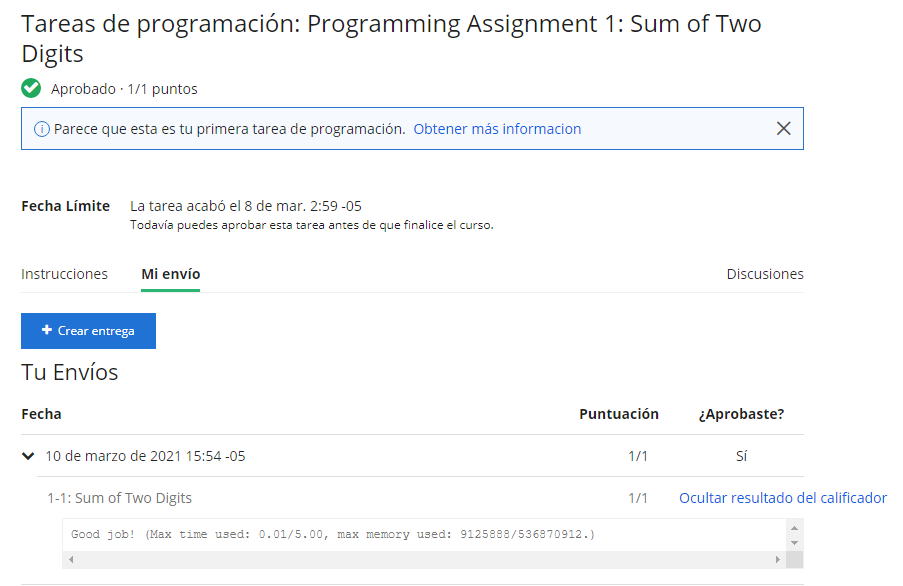"


"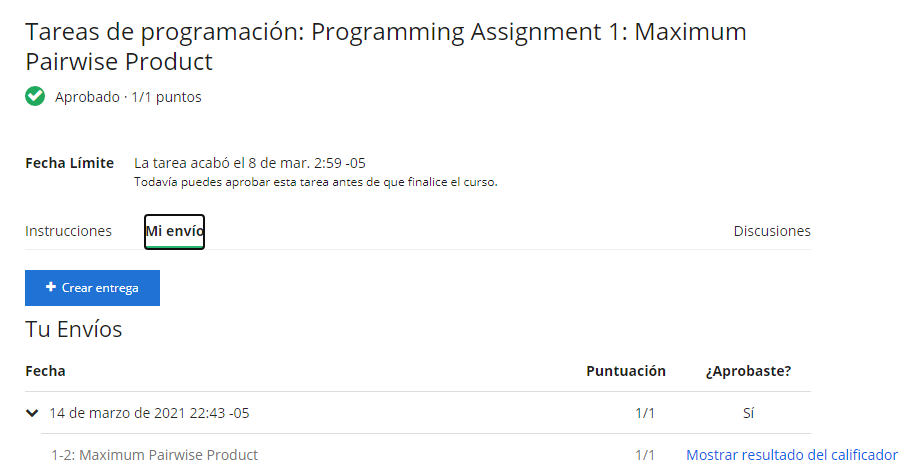"

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2344d9e3-4743-4bd9-9b0e-dd9daa8c97e3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>